In [10]:
# -*- coding: utf-8 -*-

# 代码3-1 使用describe()方法即可查看数据的基本情况
import pandas as pd
catering_sale = '../data/catering_sale.xls'  # 餐饮数据
data = pd.read_excel(catering_sale, index_col = u'日期')  # 读取数据，指定“日期”列为索引列
print(data.describe())

# 代码3-2 餐饮销额数据异常值检测

import matplotlib.pyplot as plt  # 导入图像库
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

plt.figure()  # 建立图像
p = data.boxplot(return_type='dict')  # 画箱线图，直接使用DataFrame的方法
x = p['fliers'][0].get_xdata()  #  'flies'即为异常值的标签
y = p['fliers'][0].get_ydata()
y.sort()  # 从小到大排序，该方法直接改变原对象
'''
用annotate添加注释
其中有些相近的点，注解会出现重叠，难以看清，需要一些技巧来控制
以下参数都是经过调试的，需要具体问题具体调试。
'''
for i in range(len(x)):
    if i>0:
        plt.annotate(y[i], xy = (x[i],y[i]), xytext=(x[i]+0.05 -0.8/(y[i]-y[i-1]),y[i]))
    else:
        plt.annotate(y[i], xy = (x[i],y[i]), xytext=(x[i]+0.08,y[i]))

plt.show()  # 展示箱线图

                销量
count   200.000000
mean   2755.214700
std     751.029772
min      22.000000
25%    2451.975000
50%    2655.850000
75%    3026.125000
max    9106.440000


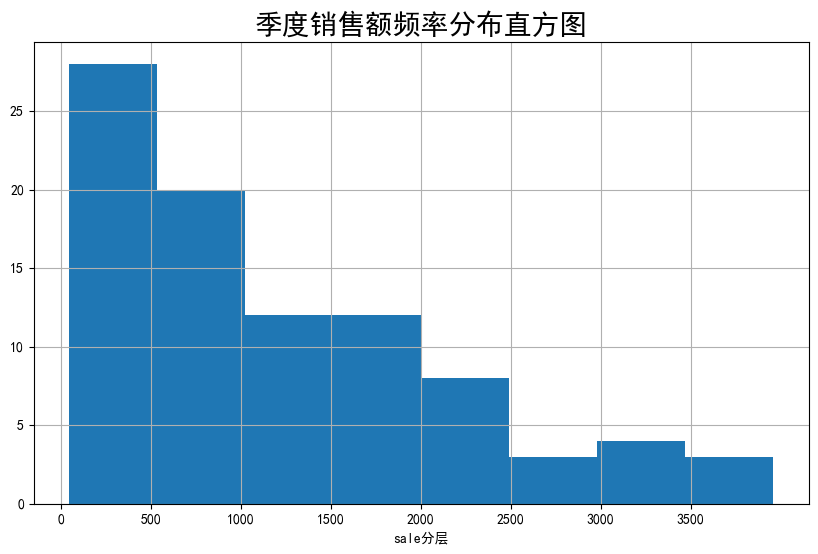

In [2]:
# -*- coding: utf-8 -*-

# 代码3-3 捞起生鱼片的季度销售情况
import pandas as pd
import numpy as np
catering_sale = '../data/catering_fish_congee.xls'  # 餐饮数据
data = pd.read_excel(catering_sale,names=['date','sale'])  # 读取数据，指定“日期”列为索引

import matplotlib.pyplot as plt
d = 500  # 设置组距
num_bins = round((max(data['sale']) - min(data['sale'])) / d)  # 计算组数
plt.figure(figsize=(10,6))  # 设置图框大小尺寸
plt.hist(data['sale'], num_bins)
plt.xticks(range(0, 4000, d))
plt.xlabel('sale分层')
plt.grid()
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.title('季度销售额频率分布直方图',fontsize=20)
plt.show()

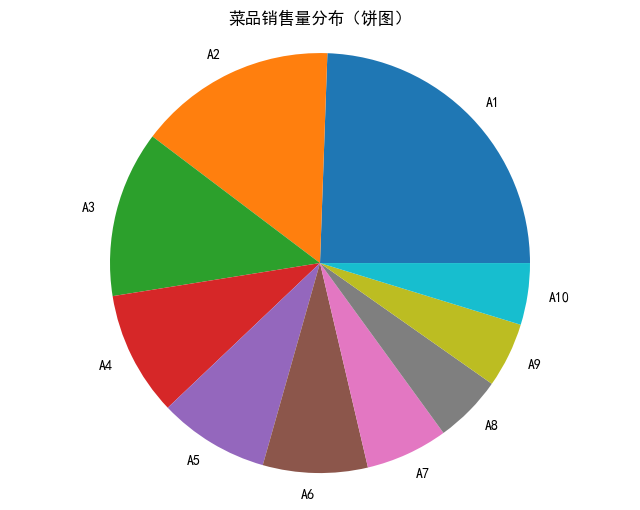

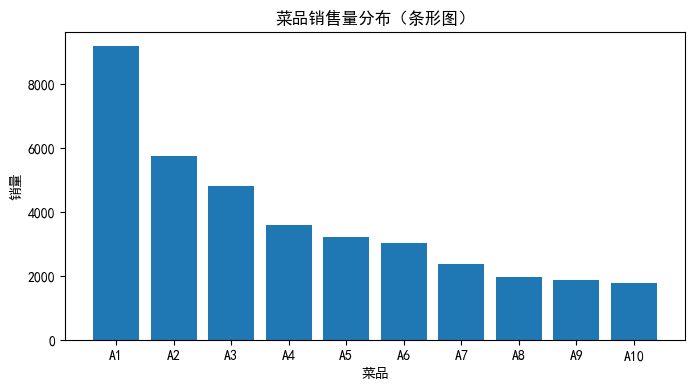

In [3]:
# 代码3-4 不同菜品在某段时间的销售量的分布情况
import pandas as pd
import matplotlib.pyplot as plt
catering_dish_profit = '../data/catering_dish_profit.xls'  # 餐饮数据
data = pd.read_excel(catering_dish_profit)  # 读取数据，指定“日期”列为索引

# 绘制饼图
x = data['盈利']
labels = data['菜品名']
plt.figure(figsize = (8, 6))  # 设置画布大小
plt.pie(x,labels=labels)  # 绘制饼图
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.title('菜品销售量分布（饼图）')  # 设置标题
plt.axis('equal')
plt.show()

# 绘制条形图
x = data['菜品名']
y = data['盈利']
plt.figure(figsize = (8, 4))  # 设置画布大小
plt.bar(x,y)
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.xlabel('菜品')  # 设置x轴标题
plt.ylabel('销量')  # 设置y轴标题
plt.title('菜品销售量分布（条形图）')  # 设置标题
plt.show()  # 展示图片


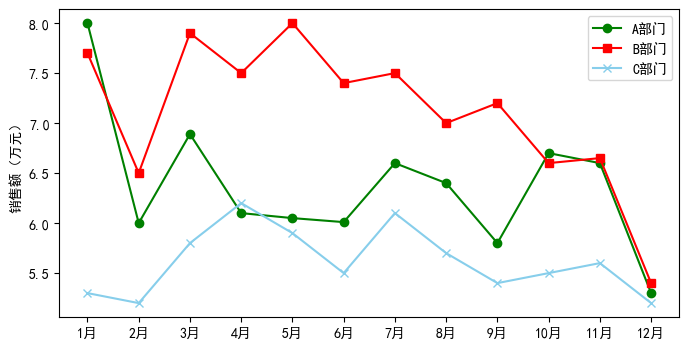

In [6]:
# 代码3-5 不同部门在各月份的销售对比情况
# 部门之间销售金额比较
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_excel("../data/dish_sale.xls")
plt.figure(figsize=(8, 4))
plt.plot(data['月份'], data['A部门'], color='green', label='A部门',marker='o')
plt.plot(data['月份'], data['B部门'], color='red', label='B部门',marker='s')
plt.plot(data['月份'], data['C部门'],  color='skyblue', label='C部门',marker='x')
plt.legend() # 显示图例
plt.ylabel('销售额（万元）')
plt.show()

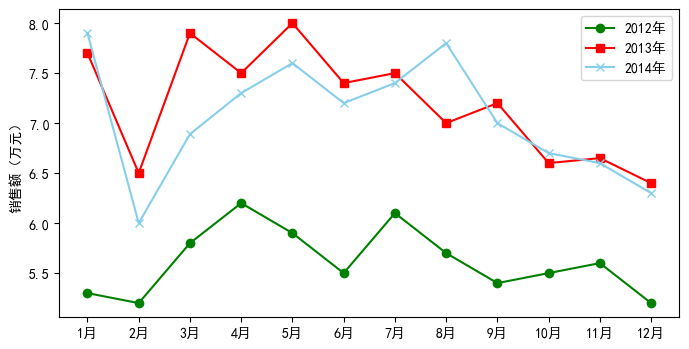

In [7]:

#  B部门各年份之间销售金额的比较
data=pd.read_excel("../data/dish_sale_b.xls")
plt.figure(figsize=(8, 4))
plt.plot(data['月份'], data['2012年'], color='green', label='2012年',marker='o')
plt.plot(data['月份'], data['2013年'], color='red', label='2013年',marker='s')
plt.plot(data['月份'], data['2014年'],  color='skyblue', label='2014年',marker='x')
plt.legend() # 显示图例
plt.ylabel('销售额（万元）')
plt.show()


In [8]:
# 代码3-6 餐饮销量数据统计量分析

# 餐饮销量数据统计量分析
import pandas as pd

catering_sale = '../data/catering_sale.xls'  # 餐饮数据
data = pd.read_excel(catering_sale, index_col = '日期')  # 读取数据，指定“日期”列为索引列
data = data[(data['销量'] > 400)&(data['销量'] < 5000)]  # 过滤异常数据
statistics = data.describe()  # 保存基本统计量

statistics.loc['range'] = statistics.loc['max']-statistics.loc['min']  # 极差
statistics.loc['var'] = statistics.loc['std']/statistics.loc['mean']  # 变异系数
statistics.loc['dis'] = statistics.loc['75%']-statistics.loc['25%']  # 四分位数间距

print(statistics)

                销量
count   195.000000
mean   2744.595385
std     424.739407
min     865.000000
25%    2460.600000
50%    2655.900000
75%    3023.200000
max    4065.200000
range  3200.200000
var       0.154755
dis     562.600000


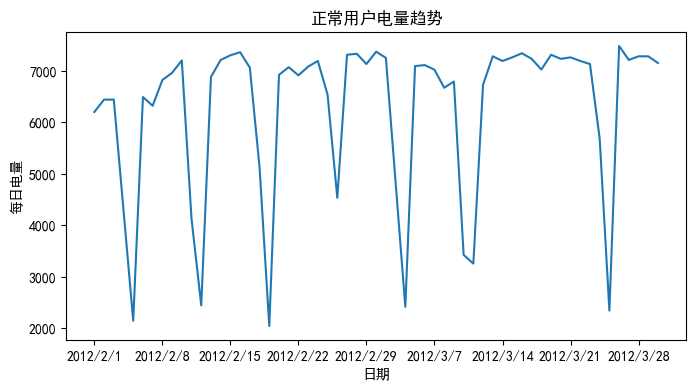

In [9]:
# 代码3-7 某单位日用电量预测分析

import pandas as pd
import matplotlib.pyplot as plt

df_normal = pd.read_csv("../data/user.csv")
plt.figure(figsize=(8,4))
plt.plot(df_normal["Date"],df_normal["Eletricity"])
plt.xlabel("日期")
plt.ylabel("每日电量")
# 设置x轴刻度间隔
x_major_locator = plt.MultipleLocator(7)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.title("正常用户电量趋势")
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.show()  # 展示图片



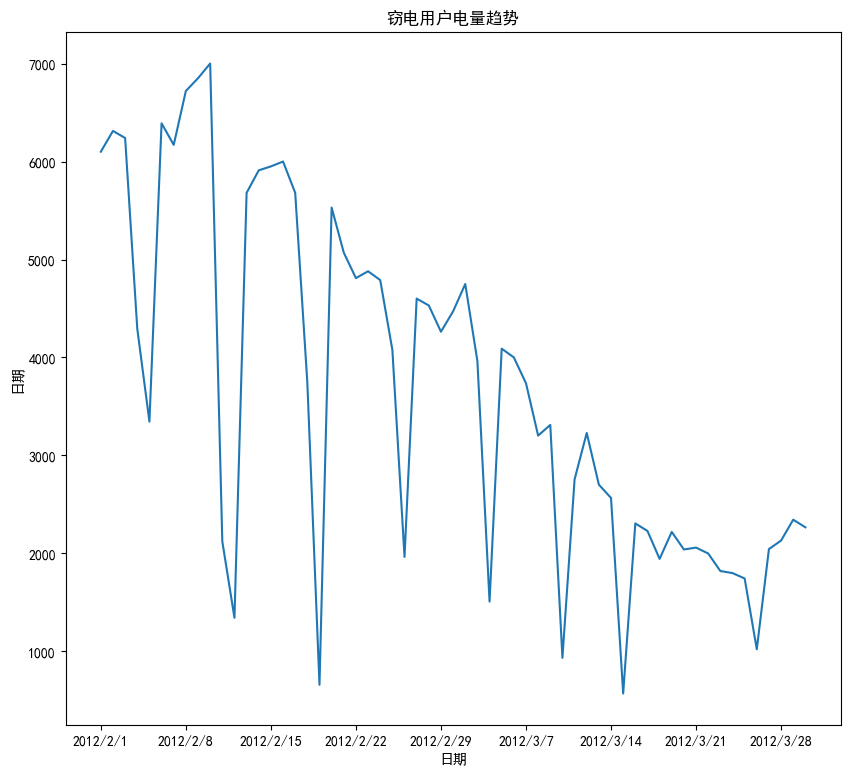

In [10]:
# 窃电用户用电趋势分析
df_steal = pd.read_csv("../data/Steal user.csv")
plt.figure(figsize=(10, 9))
plt.plot(df_steal["Date"],df_steal["Eletricity"])
plt.xlabel("日期")
plt.ylabel("日期")
# 设置x轴刻度间隔
x_major_locator = plt.MultipleLocator(7)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.title("窃电用户电量趋势")
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.show()  # 展示图片

C:\Users\yorky\AppData\Local\Temp\ipykernel_52308\1012988734.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(format(p[6], '.4%'), xy = (6, p[6]), xytext=(6*0.9, p[6]*0.9), arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))  # 添加注释，即85%处的标记。这里包括了指定箭头样式。


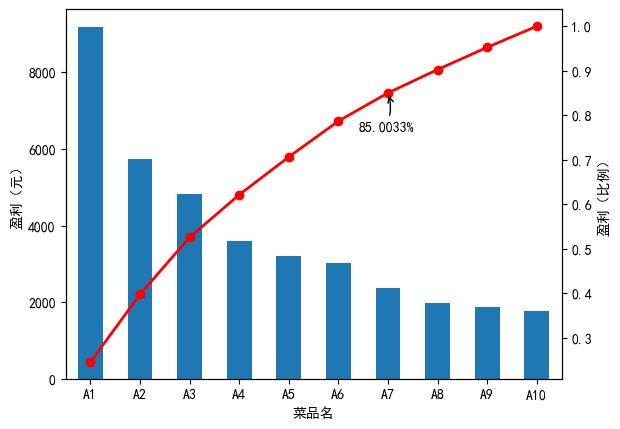

In [11]:
# 代码3-8 菜品盈利帕累托图

# 菜品盈利数据 帕累托图
import pandas as pd

# 初始化参数
dish_profit = '../data/catering_dish_profit.xls'  # 餐饮菜品盈利数据
data = pd.read_excel(dish_profit, index_col = '菜品名')
data = data['盈利'].copy()
data.sort_values(ascending = False)

import matplotlib.pyplot as plt  # 导入图像库
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

plt.figure()
data.plot(kind='bar')
plt.ylabel('盈利（元）')
p = 1.0*data.cumsum()/data.sum()
p.plot(color = 'r', secondary_y = True, style = '-o',linewidth = 2)
plt.annotate(format(p[6], '.4%'), xy = (6, p[6]), xytext=(6*0.9, p[6]*0.9), arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))  # 添加注释，即85%处的标记。这里包括了指定箭头样式。
plt.ylabel('盈利（比例）')
plt.show()


In [12]:
# 代码3-9 餐饮销量数据相关性分析

# 餐饮销量数据相关性分析
from __future__ import print_function
import pandas as pd

catering_sale = '../data/catering_sale_all.xls'  # 餐饮数据，含有其他属性
data = pd.read_excel(catering_sale, index_col = '日期')  # 读取数据，指定“日期”列为索引列

print(data.corr())  # 相关系数矩阵，即给出了任意两款菜式之间的相关系数
print(data.corr()['百合酱蒸凤爪'])  # 只显示“百合酱蒸凤爪”与其他菜式的相关系数
# 计算“百合酱蒸凤爪”与“翡翠蒸香茜饺”的相关系数
print(data['百合酱蒸凤爪'].corr(data['翡翠蒸香茜饺']))



           百合酱蒸凤爪    翡翠蒸香茜饺   金银蒜汁蒸排骨     乐膳真味鸡     蜜汁焗餐包      生炒菜心    铁板酸菜豆腐  \
百合酱蒸凤爪   1.000000  0.009206  0.016799  0.455638  0.098085  0.308496  0.204898   
翡翠蒸香茜饺   0.009206  1.000000  0.304434 -0.012279  0.058745 -0.180446 -0.026908   
金银蒜汁蒸排骨  0.016799  0.304434  1.000000  0.035135  0.096218 -0.184290  0.187272   
乐膳真味鸡    0.455638 -0.012279  0.035135  1.000000  0.016006  0.325462  0.297692   
蜜汁焗餐包    0.098085  0.058745  0.096218  0.016006  1.000000  0.308454  0.502025   
生炒菜心     0.308496 -0.180446 -0.184290  0.325462  0.308454  1.000000  0.369787   
铁板酸菜豆腐   0.204898 -0.026908  0.187272  0.297692  0.502025  0.369787  1.000000   
香煎韭菜饺    0.127448  0.062344  0.121543 -0.068866  0.155428  0.038233  0.095543   
香煎罗卜糕   -0.090276  0.270276  0.077808 -0.030222  0.171005  0.049898  0.157958   
原汁原味菜心   0.428316  0.020462  0.029074  0.421878  0.527844  0.122988  0.567332   

            香煎韭菜饺     香煎罗卜糕    原汁原味菜心  
百合酱蒸凤爪   0.127448 -0.090276  0.428316  
翡翠蒸香茜饺   0.062344  0.270276 

In [12]:
# -*- coding: utf-8 -*-

# 代码3-10 计算两个列向量的相关系数
import pandas as pd
D = pd.DataFrame([range(1, 8), range(2, 9)])  # 生成样本D，一行为1~7，一行为2~8
print(D.corr(method='spearman'))  # 计算相关系数矩阵
S1 = D.loc[0]  # 提取第一行
S2 = D.loc[1]  # 提取第二行
print(S1.corr(S2, method='pearson'))  # 计算S1、S2的相关系数


     0    1    2    3    4    5    6
0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
1  1.0  1.0  1.0  1.0  1.0  1.0  1.0
2  1.0  1.0  1.0  1.0  1.0  1.0  1.0
3  1.0  1.0  1.0  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0  1.0  1.0  1.0
6  1.0  1.0  1.0  1.0  1.0  1.0  1.0
1.0


In [13]:
# 代码3-11 计算6×5随机矩阵的协方差矩阵

import numpy as np
D = pd.DataFrame(np.random.randn(6, 5))  # 产生6×5随机矩阵
print(D.cov())  # 计算协方差矩阵
print(D[0].cov(D[1]))  # 计算第一列和第二列的协方差

          0         1         2         3         4
0  0.383614 -0.190074 -0.101272 -0.371889  0.040060
1 -0.190074  0.885324  0.031566  0.725395 -0.135926
2 -0.101272  0.031566  0.795927 -0.228336 -0.235301
3 -0.371889  0.725395 -0.228336  1.106636  0.170103
4  0.040060 -0.135926 -0.235301  0.170103  0.242773
-0.1900735536857667


In [14]:
# 代码3-12 计算6×5随机矩阵的偏度（三阶矩）∕峰度（四阶矩）
import numpy as np
D = pd.DataFrame(np.random.randn(6, 5))  # 产生6×5随机矩阵
print(D.skew())  # 计算偏度
print(D.kurt())  # 计算峰度

0   -0.172909
1   -0.512429
2   -0.083593
3   -0.947497
4    0.516289
dtype: float64
0   -0.470885
1   -1.374080
2   -0.558287
3    1.897826
4   -1.508960
dtype: float64


In [15]:

# 代码3-13 6×5随机矩阵的describe

import numpy as np
D = pd.DataFrame(np.random.randn(6, 5))  # 产生6×5随机矩阵
print(D.describe())


              0         1         2         3         4
count  6.000000  6.000000  6.000000  6.000000  6.000000
mean  -0.332867 -0.370159  0.741471  0.635599 -0.015134
std    1.464969  1.021928  1.177013  0.715398  1.056776
min   -2.761250 -1.560154 -0.741530 -0.537927 -1.816206
25%   -0.991935 -1.217500 -0.051930  0.386341 -0.380542
50%    0.190769 -0.226754  0.714425  0.681938  0.164282
75%    0.419137  0.126462  1.410685  1.039368  0.658331
max    1.273418  1.096257  2.426116  1.541328  1.135971


In [16]:
# 代码3-14 pandas累积统计特征函数、移动窗口统计函数示例


D=pd.Series(range(0, 20))  # 构造Series，内容为0~19共20个整数
print(D.cumsum())  # 给出前n项和
print(D.rolling(2).sum())  # 依次对相邻两项求和

0       0
1       1
2       3
3       6
4      10
5      15
6      21
7      28
8      36
9      45
10     55
11     66
12     78
13     91
14    105
15    120
16    136
17    153
18    171
19    190
dtype: int64
0      NaN
1      1.0
2      3.0
3      5.0
4      7.0
5      9.0
6     11.0
7     13.0
8     15.0
9     17.0
10    19.0
11    21.0
12    23.0
13    25.0
14    27.0
15    29.0
16    31.0
17    33.0
18    35.0
19    37.0
dtype: float64


In [13]:
# 代码3-15 绘图之前需要加载的代码
import matplotlib.pyplot as plt  # 导入绘图库
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.figure(figsize = (7, 5))  # 创建图像区域，指定比例
plt.show()

<Figure size 700x500 with 0 Axes>

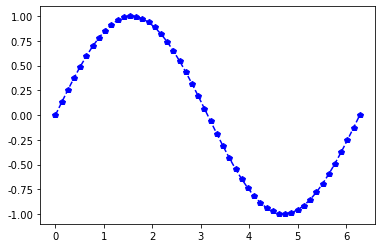

In [20]:
# 代码3-16 绘制一条蓝色的正弦虚线

import numpy as np
x = np.linspace(0,2*np.pi,50)  # x坐标输入
y = np.sin(x)  # 计算对应x的正弦值
plt.plot(x, y, 'bp--')  # 控制图形格式为蓝色带星虚线，显示正弦曲线
plt.show()

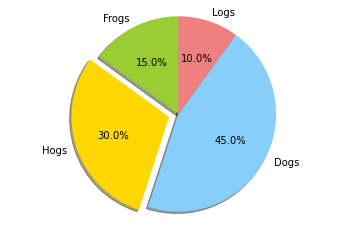

In [21]:
# 代码3-17 绘制饼图


import matplotlib.pyplot as plt

# The slices will be ordered and plotted counter-clockwise.
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'  # 定义标签
sizes = [15, 30, 45, 10]  # 每一块的比例
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']  # 每一块的颜色
explode = (0, 0.1, 0, 0)  # 突出显示，这里仅仅突出显示第二块（即'Hogs'）

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # 显示为圆（避免比例压缩为椭圆）
plt.show()

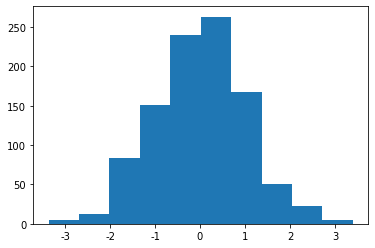

In [22]:

# 代码3-18 绘制二维条形直方图

import matplotlib.pyplot as plt
import numpy as np
x = np.random.randn(1000)  # 1000个服从正态分布的随机数
plt.hist(x, 10)  # 分成10组进行绘制直方图
plt.show()

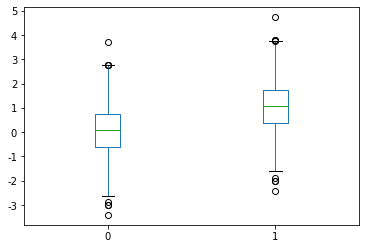

In [23]:
# 代码3-19 绘制箱型图


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
x = np.random.randn(1000)  # 1000个服从正态分布的随机数
D = pd.DataFrame([x, x+1]).T  # 构造两列的DataFrame
D.plot(kind = 'box')  # 调用Series内置的绘图方法画图，用kind参数指定箱型图box
plt.show()

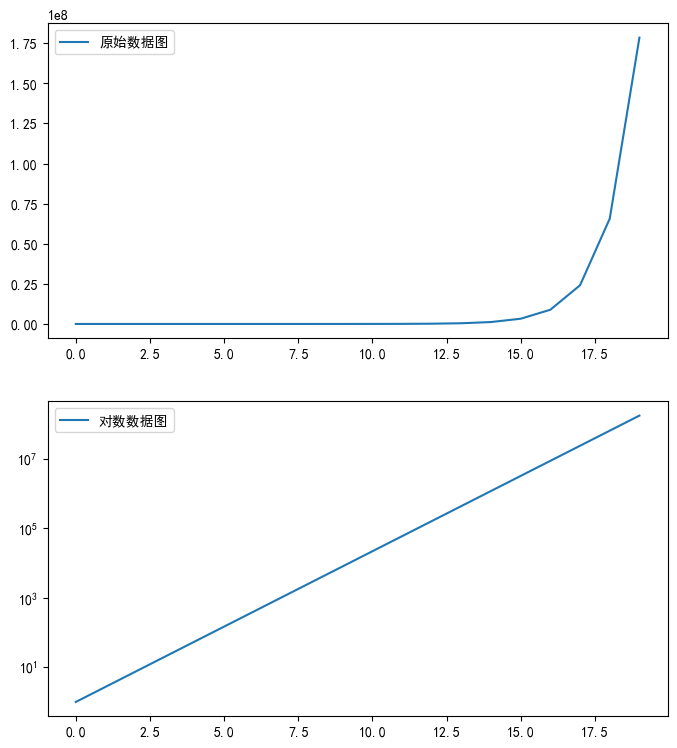

In [14]:
# 代码3-20 使用plot(logy = True)函数进行绘图


import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
import numpy as np
import pandas as pd

x = pd.Series(np.exp(np.arange(20)))  # 原始数据
plt.figure(figsize = (8, 9))  # 设置画布大小 
ax1 = plt.subplot(2, 1, 1)
x.plot(label = '原始数据图', legend = True)

ax1 = plt.subplot(2, 1, 2)
x.plot(logy = True, label = '对数数据图', legend = True)
plt.show()

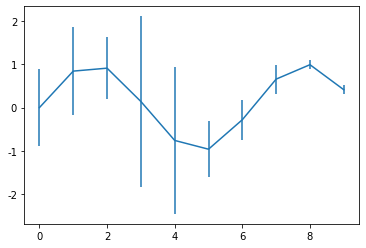

In [25]:
# 代码3-21 绘制误差棒图


import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
import numpy as np
import pandas as pd

error = np.random.randn(10)  # 定义误差列
y = pd.Series(np.sin(np.arange(10)))  # 均值数据列
y.plot(yerr = error)  # 绘制误差图
plt.show()